# Classificação de Imagens com CNN (CIFAR-10)

In [2]:
# 1. Importação de bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
# 2. Carregar o dataset CIFAR-10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print("Formato dos dados de treino:", X_train.shape)
print("Formato dos dados de teste:", X_test.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Formato dos dados de treino: (50000, 32, 32, 3)
Formato dos dados de teste: (10000, 32, 32, 3)


In [9]:
len(X_train)


50000

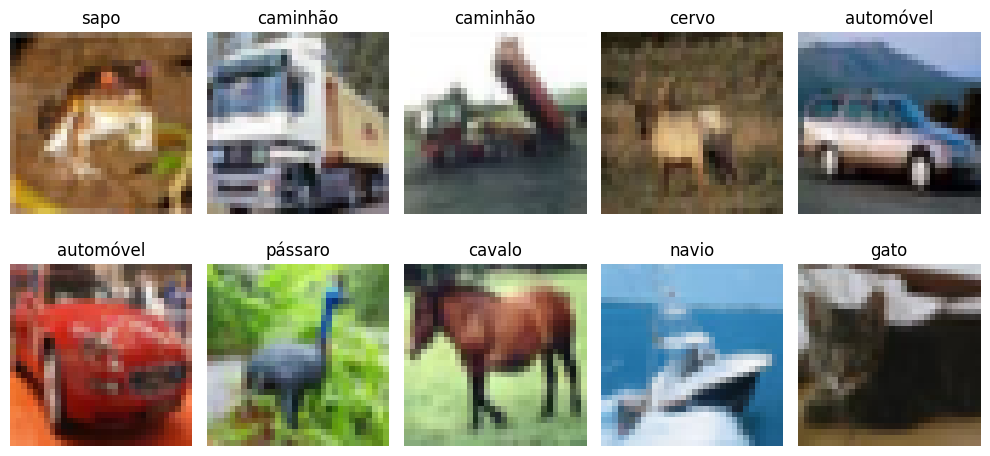

In [4]:
# 3. Visualizar algumas imagens
classes = ['avião', 'automóvel', 'pássaro', 'gato', 'cervo',
           'cachorro', 'sapo', 'cavalo', 'navio', 'caminhão']

plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_train[i])
    plt.title(classes[y_train[i][0]])
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
# 4. Pré-processamento
X_train = X_train.astype('float32') / 255.0 #cada pixel é de 0 à 255. Então, normalizamos os valores dividindo por 255
X_test  = X_test.astype('float32') / 255.0

y_train = y_train.flatten()
y_test  = y_test.flatten()

- Se tiver dúvidas sobre convolução, ler: https://dev.to/giselyalves13/entendendo-redes-convolucionais-cnns-42h9

In [22]:
# 5. Criar o modelo CNN
model = Sequential([
    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)),#Camanda 1: Aplica 32 filtros 3x3 com ativação ReLU. O 'padding=same' mantém a saída do mesmo tamanho da entrada (32x32).
    MaxPooling2D((2,2)),# Reduz novamente as dimensões pela metade (32x32 → 8x8), mantendo os 32 canais.
    Conv2D(64, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2)),# Reduz novamente as dimensões pela metade (16x16 → 8x8), mantendo os 64 canais.
    Flatten(),# Transforma o tensor 3D de saída anterior (8x8x64 = 4096) em um vetor 1D para ser processado pela camada densa.
    Dense(128, activation='relu'),# 128 neurônios com ativação ReLU para aprender combinações não-lineares das características extraídas.
    Dropout(0.5),# Zera aleatoriamente 50% das ativações dessa camada durante o treino, para reduzir overfitting.
    Dense(10, activation='softmax')#Camada de saída: 10 neurônios (uma para cada classe do CIFAR-10), com ativação softmax para gerar uma distribuição de probabilidade.
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 545,098 (2.08 MB)

 Trainable params: 545,098 (2.08 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
# 6. Treinamento do modelo
history = model.fit(X_train, y_train,
                    epochs=3,
                    batch_size=64,#O batch_size define quantas imagens são processadas por época
                    validation_split=0.2)

Epoch 1/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 61s 98ms/step - accuracy: 0.4554 - loss: 1.4940 - val_accuracy: 0.5386 - val_loss: 1.3234
Epoch 2/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 96ms/step - accuracy: 0.4908 - loss: 1.4026 - val_accuracy: 0.5647 - val_loss: 1.2520
Epoch 3/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 97ms/step - accuracy: 0.5305 - loss: 1.3119 - val_accuracy: 0.5913 - val_loss: 1.1648


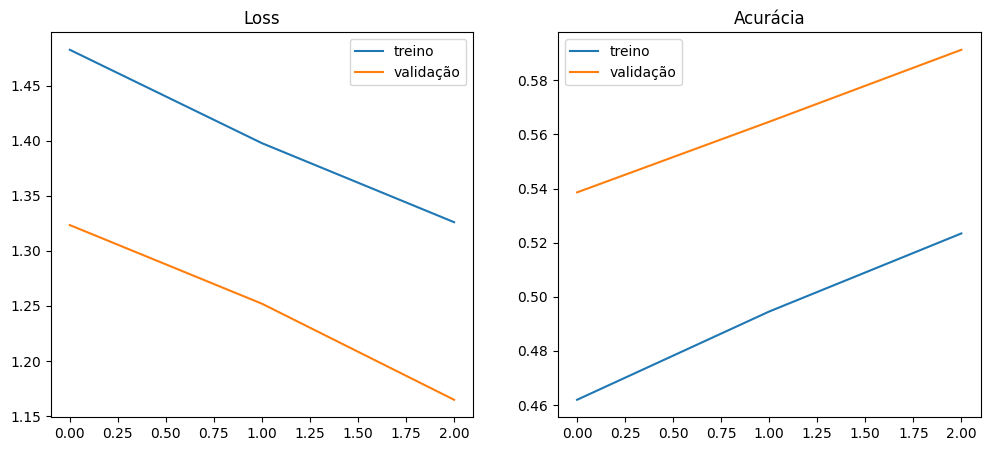

In [34]:
# 7. Plotar curva de loss e acurácia
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='treino')
plt.plot(history.history['val_loss'], label='validação')
plt.title("Loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='treino')
plt.plot(history.history['val_accuracy'], label='validação')
plt.title("Acurácia")
plt.legend()

plt.show()

In [ ]:
# 8. Avaliação no conjunto de teste
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Acurácia no teste: {test_acc:.4f}")

In [ ]:
# 9. Matriz de confusão
y_pred = np.argmax(model.predict(X_test), axis=1)

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=classes, yticklabels=classes)
plt.xlabel("Previsto")
plt.ylabel("Verdadeiro")
plt.title("Matriz de Confusão")
plt.show()

In [ ]:
# 10. Relatório de classificação
print(classification_report(y_test, y_pred, target_names=classes))